In [7]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [8]:
root_path = '../'
datasets = ['mnli','agnews', 'yahoo','yelp-full'] # , 
methods = ['fedclassifier', 'fedpet']

sampled_data = 100
clients_in_total = 10
clients = 5
iter = 100

log_paths_all = {}
csv_paths_all = {}
for dataset in datasets:
    log_paths_all[dataset] = []
    csv_paths_all[dataset] = []
    for method in methods:
        log_paths_all[dataset].append(os.path.join(root_path, 'log', dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".log"))
        csv_paths_all[dataset].append(os.path.join(root_path, "data", dataset, method + '_' + str(sampled_data) + '_' + str(clients_in_total) + ".csv"))


In [9]:
csv_paths_all

{'mnli': ['../data/mnli/fedclassifier_100_10.csv',
  '../data/mnli/fedpet_100_10.csv'],
 'agnews': ['../data/agnews/fedclassifier_100_10.csv',
  '../data/agnews/fedpet_100_10.csv'],
 'yahoo': ['../data/yahoo/fedclassifier_100_10.csv',
  '../data/yahoo/fedpet_100_10.csv'],
 'yelp-full': ['../data/yelp-full/fedclassifier_100_10.csv',
  '../data/yelp-full/fedpet_100_10.csv']}

In [10]:
colors = ['g', 'r', 'b', 'y', 'purple','k', 'olive','cyan']

In [11]:
for dataset in datasets:
    log_paths = log_paths_all[dataset]
    csv_paths = csv_paths_all[dataset]
    for i in range(len(methods)):
        method = methods[i]
        log_path = log_paths[i]
        phrase = 'modeling - //data/cdq/pet_data/log/' + dataset + '/' + method + '_' + str(sampled_data) + '_' + str(clients_in_total)
        
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None,index = range(iter), columns = range(clients))

        for line in f:
            if phrase in line:
                
                gen = int(re.findall(r'/g(.+?)/',line)[0])
                client = int(re.findall(r'client(.+?)',line)[0])

                score_line = f[f.index(line)+2]
                acc = float(re.findall(r':?(\d+\.\d+)',score_line)[0])
                df[client][gen]=acc
        df.to_csv(csv_paths[i])

        # print(log_path)
        # print(df)


fedclassifier 0.4487356321839081
fedpet 0.47977011494252875
../fig/eval-performance-mnli_100.pdf
fedclassifier nan
fedpet 0.8713157894736842
../fig/eval-performance-agnews_100.pdf
fedclassifier 0.49923333333333336
fedpet 0.6376666666666667
../fig/eval-performance-yahoo_100.pdf
fedclassifier 0.4112
fedpet 0.42716000000000004
../fig/eval-performance-yelp-full_100.pdf


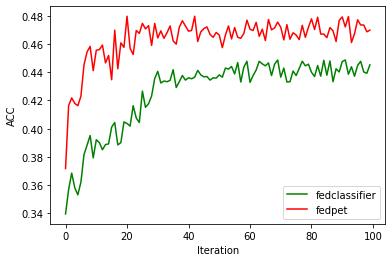

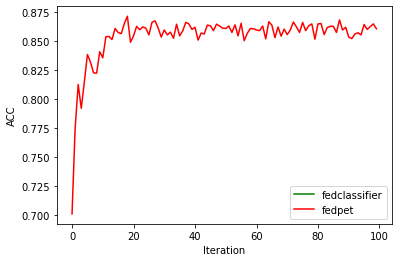

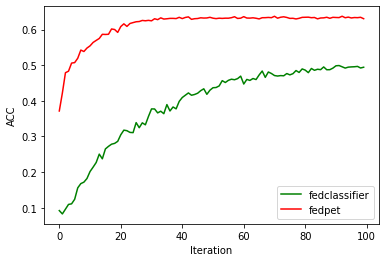

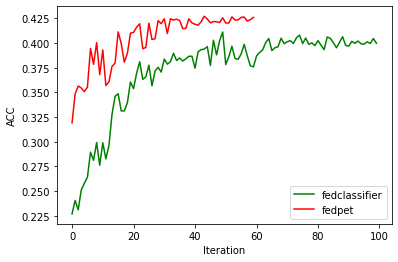

In [12]:
for dataset in datasets:
    fig = plt.figure()
    # plt.title(dataset)
    plt.xlabel('Iteration')
    plt.ylabel('ACC')
    csv_paths = csv_paths_all[dataset]

    for i in range(len(methods)):
        csv_path = csv_paths[i]
        df = pd.read_csv(csv_path,index_col=0)
        y_mean = []
        for j in range(iter):
            x = np.array([j]*5)
            y = np.array(df.iloc[j])
            # print(x,y)
            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(x, y,color=colors[i])
        print(methods[i], float(np.max(pd.DataFrame(y_mean).dropna())))
        plt.plot(range(iter),y_mean,color=colors[i],label=methods[i])
    plt.legend()
    print("../fig/eval-performance-" + dataset + "_" + str(sampled_data) + '.pdf')
    plt.savefig("../fig/eval-performance-" + dataset + "_" + str(sampled_data) + '.pdf')


    
    
    # plt.show()